# Date-a Science
_Aindra Thin, Iain Bromley, Shiyue (Sybil) Wang, Yash Vig_

The purpose of our research project is to explore the specific attributes and characteristics which shape people’s decisions in their selecting their romantic partners. This study fits into the broader scope of psychological research which tests predefined notions of interpersonal relationships and their realistic outcomes.

**We aim to answer the following questions:**
- How much does race play a factor in the selection of potential partners? 
- How important are shared interests important in terms of relationship compatibility? 
- What are factors that affect the likelihood of going on a second date?
- Difference in male and female partner selection

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi

In [4]:
all_data = pd.read_csv('data/data.csv')

## Data Prep
> The dataset that we acquired contained 195 columns. Much of this data does not help us answer our research questions, so we have filtered them out. We decided not to add any extra columns, because there was so much data available for us to explore our research questions.

In [5]:
data = all_data[['iid', 'pid', 'gender', 'order', 'age', 'age_o', 'imprace', 'samerace', 'attr', 'sinc', 'intel', \
                 'fun', 'amb', 'shar', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o',  'int_corr', \
                 'dec', 'dec_o', 'match', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', \
                 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1']]

In [6]:
data.head()

,iid,pid,gender,order,age,age_o,imprace,samerace,attr,sinc,...,intel1_1,fun1_1,amb1_1,shar1_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1
0,1,11.0,0,4,21.0,27.0,2.0,0,6.0,9.0,...,20.0,15.0,15.0,15.0,35.0,20.0,15.0,20.0,5.0,5.0
1,1,12.0,0,3,21.0,22.0,2.0,0,7.0,8.0,...,20.0,15.0,15.0,15.0,35.0,20.0,15.0,20.0,5.0,5.0
2,1,13.0,0,10,21.0,22.0,2.0,1,5.0,8.0,...,20.0,15.0,15.0,15.0,35.0,20.0,15.0,20.0,5.0,5.0
3,1,14.0,0,5,21.0,23.0,2.0,0,7.0,6.0,...,20.0,15.0,15.0,15.0,35.0,20.0,15.0,20.0,5.0,5.0
4,1,15.0,0,7,21.0,24.0,2.0,0,5.0,6.0,...,20.0,15.0,15.0,15.0,35.0,20.0,15.0,20.0,5.0,5.0


## Exploratory Data Analysis
> The first section of your report will provide a detailed overview of the dataset. Using both written and visual approaches, this section will introduce the data to the reader in the context of the research questions. Be sure to provide in depth analyses of the distributions of key variables of interest. More than anything, this section should convey a nuanced understanding of the dataset being used.

### Overview
> Our data is formatted as _paired data_. Each row represent's one participants's experience in one round of a speed dating, where we have the following information: 
- **iid**: the participants's unique ID number
- **pid**: the unique ID number of their partner during that round.  
- **imprace**: how important is it to date a partner of the same race? (scale of 1-10)
- **samerace**: participant and partner were the same race (0=no, 1=yes)
- **dec**: the participant's decision to see partner again (0=no, 1=yes)
- **dec_o**: partner's decision to see participant again (0=no, 1=yes)
- **match**: both partners decided to see each other again (0=no, 1=yes)

> There are many columns that are repeated throughout the dataset, which represent different attributes of participants:
- Attractiveness "attr"
- Sincerity "sinc"
- Intelligence "intel"
- Funny "fun"
- Ambition "amb"
- Shared Interests "shar"

> Suffixes are added to each attribute which mean the following:  
> (Formatted so that _attribute_ is the shortened name of the attribute)
- **_attribute_** : the participant's rating of their partner (scale of 1-10)
- **_attribute_\_o**: the partner's rating of this person (scale of 1-10)
- **_attribute_\_1_1**: what participant looks for in a partner (given 100 points to distribute among all 6 attributes)
- **_attribute_\_2_1**: what the participant thinks the opposite sex looks for in a partner (given 100 points to distribute among all 6 attributes)

In [7]:
by_person = data[["iid", "dec", "match"]].groupby("iid").aggregate("sum")

success_rate = []
for i, row in by_person.iterrows():
    if row['dec'] == 0.0:
        success_rate.append(0)
    else:
        success_rate.append(row['match'] / row['dec'])
by_person.insert(1, 'success_rate', success_rate)

#### Success Rate
> This histogram shows the success rate of speed dating. This is measured by two variables: **dec** and **match**  
> Out of the number of partners that a participant chooses to see again, what ratio of them share a mutual interest?

Text(0,0.5,'Frequency')

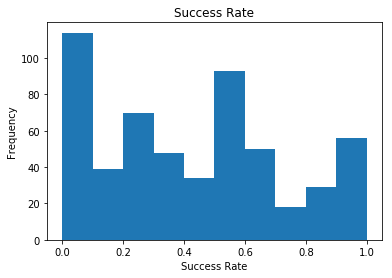

In [8]:
plt.hist(success_rate)
plt.title("Success Rate")
plt.xlabel("Success Rate")
plt.ylabel("Frequency")

#### Importance of Different Attributes
> These paired box plots show how important each attribute is in finding a romantic partner.  
> Green represents ratings where participants indicated that they would go on a second date with their partner,  
where yellow represents ratings where they would not.  
> For every attribute except for **ambition**, the 'yes' to second date responses had higher ratings.  
  
> Out of all of these attributes, this would indicate that **ambition** is the least important in finding a partner.

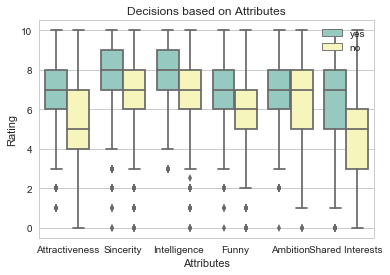

In [10]:
 data_select = data[['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'dec']]
data_select.columns = ["Attractiveness", "Sincerity", "Intelligence", "Funny", "Ambition", "Shared Interests", "Decision"]
shaped = pd.melt(data_select, id_vars=['Decision'], value_name='score')
shaped['Decision'] = shaped['Decision'].map({1: 'yes', 0: 'no'})
sns.set(style="whitegrid")
ax = sns.boxplot(x="variable", y="score", hue="Decision",
                data=shaped, palette="Set3")
ax.set_title('Decisions based on Attributes')
ax.set_ylabel('Rating')
ax.set_xlabel('Attributes')
plt.legend(loc='upper right')
plt.show()

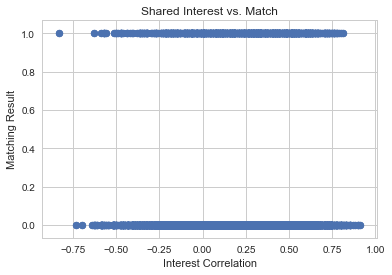

In [11]:
#Shared interest vs. match
share_int = data[['int_corr','match']] 

plt.title("Shared Interest vs. Match")
plt.xlabel("Interest Correlation")
plt.ylabel("Matching Result")
plt.scatter(share_int.int_corr, share_int.match)
plt.show()